# Generating random walks

Based on a starting point and for a given distance, generate a random walk.

In [161]:
import random

import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt

%matplotlib inline

ox.config(use_cache=True, log_console=True)

In [175]:
# Starting point is the Ludwig-Barnay Platz in Wilmersdorf, Berlin
START_POINT = (52.46794, 13.31386)

# Distance of bounding box around the starting point in meters
DISTANCE = 500

# Walk target distance in meters
ROUTES_TARGET_DISTANCE = 5000

# Plot options
PLOT_OPT_BGCOLOR = '#2E3235'
PLOT_OPT_BUILDING_COLOR = '#000000'

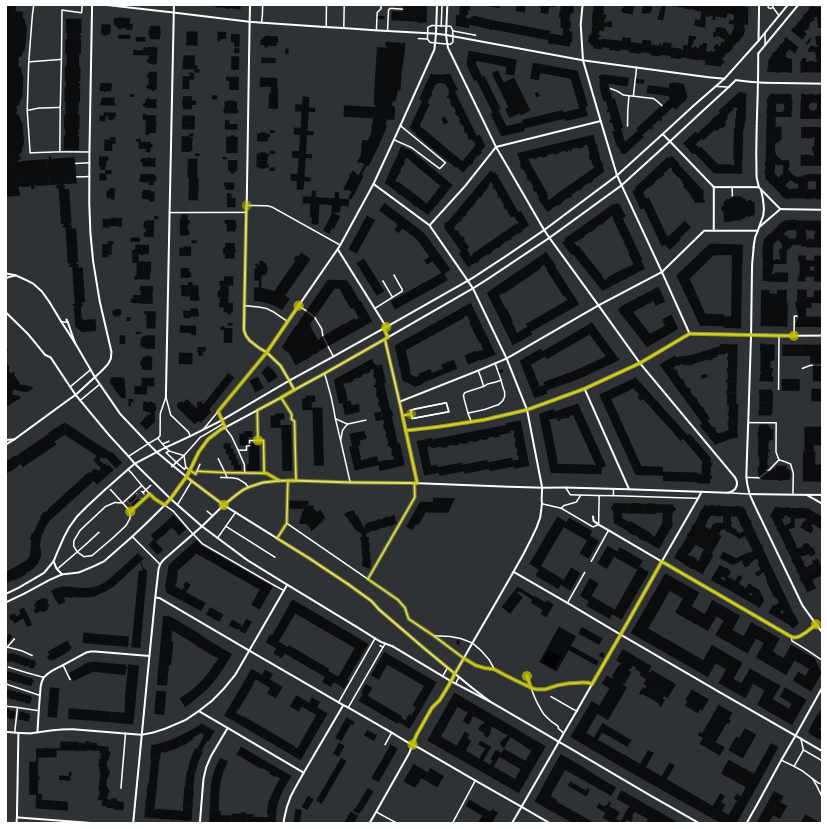

In [181]:
# Plot figure ground
fig, ax = ox.plot_figure_ground(point=START_POINT,
                                dist=DISTANCE,
                                network_type='walk',
                                bgcolor=PLOT_OPT_BGCOLOR,
                                default_width=2,
                                figsize=(15, 15),
                                show=False,
                                close=False)

# Plot buildings
footprint = ox.footprints_from_point(START_POINT, dist=DISTANCE)
footprint.plot(ax=ax, color=PLOT_OPT_BUILDING_COLOR, alpha=0.75)

# Find route between random points reaching a target distance
G = ox.graph_from_point(START_POINT, dist=DISTANCE, network_type='walk')
start_node = ox.get_nearest_node(G, START_POINT)

total_distance = 0
routes = []
current_node = start_node
while total_distance < ROUTES_TARGET_DISTANCE:
    next_node = choice(list(graph.nodes()))
    route = nx.shortest_path(G, current_node, next_node, weight='length')
    distance = nx.shortest_path_length(G, current_node, next_node, weight='length')

    routes.append(route)
    total_distance += distance
    current_node = next_node

ox.plot_graph_routes(G, routes, ax=ax, route_colors='y')

plt.show()